# レポート2(提出期限5/25)

**必ず名前と学籍番号を書くこと**

名前：

学籍番号：

## 2.1 線形回帰(10点)

seaborn組み込みのダイアモンドの価格データをつかって重回帰分析を行い、
適切だと思う説明変数の組み合わせをもとめなさい

In [21]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

# データの取得・確認
diamond = sns.load_dataset('diamonds')
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [22]:
diamond.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [23]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


分離してみる

訓練データとテストデータに分割してみます。(**第9回講義P7、ホールドアウトと交差検証**)

In [24]:
from sklearn.model_selection import train_test_split
x = diamond.drop("price",axis=1)
y = diamond.pop("price")

x_train, x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

とりあえず全部のパラメータをいれてみる。

In [25]:
df_train = pd.concat([x_train, y_train], axis = 1)

In [27]:
#　回帰の実施

import statsmodels.formula.api as smf
model = smf.glm('price ~ carat + color + clarity +depth+table+cut+x+y+z', df_train) 
fit = model.fit()                                
fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Generalized linear model
==========================================================================
Model:                 GLM               AIC:             729737.5906     
Link Function:         identity          BIC:             55761532202.6060
Dependent Variable:    price             Log-Likelihood:  -3.6484e+05     
Date:                  2023-05-27 02:02  LL-Null:         -6.1044e+05     
No. Observations:      43152             Deviance:        5.5762e+10      
Df Model:              23                Pearson chi2:    5.58e+10        
Df Residuals:          43128             Scale:           1.2929e+06      
Method:                IRLS                                               
--------------------------------------------------------------------------
                   Coef.    Std.Err.    z     P>|z|    [0.025     0.975]  
--------------------------------------------------------------------------
Intercept         8039.3772 433.4326  18.5482 0.0000  7189.8648  8888.8895
color[T.E]        -223.4052  20.1161 -11.1058 0.0000  -262.8320  -183.9783
color[T.F]        -282.9233  20.3688 -13.8900 0.0000  -322.8455  -243.0011
color[T.G]        -492.1973  19.9387 -24.6856 0.0000  -531.2763  -453.1183
color[T.H]        -988.0699  21.2226 -46.5574 0.0000 -1029.6655  -946.4743
color[T.I]       -1465.8882  23.7800 -61.6439 0.0000 -1512.4961 -1419.2804
color[T.J]       -2371.6690  29.4191 -80.6168 0.0000 -2429.3293 -2314.0087
clarity[T.VVS1]   -351.9432  36.6364  -9.6064 0.0000  -423.7492  -280.1373
clarity[T.VVS2]   -426.5601  35.0363 -12.1748 0.0000  -495.2300  -357.8902
clarity[T.VS1]    -783.8550  33.4686 -23.4206 0.0000  -849.4522  -718.2578
clarity[T.VS2]   -1104.1529  32.6782 -33.7886 0.0000 -1168.2010 -1040.1047
clarity[T.SI1]   -1707.7349  32.9348 -51.8520 0.0000 -1772.2859 -1643.1839
clarity[T.SI2]   -2655.2723  34.2359 -77.5582 0.0000 -2722.3734 -2588.1712
clarity[T.I1]    -5455.7226  57.9553 -94.1368 0.0000 -5569.3128 -5342.1323
cut[T.Premium]     -70.3491  16.4068  -4.2878 0.0000  -102.5059   -38.1923
cut[T.Very Good]   -98.5277  16.0132  -6.1529 0.0000  -129.9130   -67.1425
cut[T.Good]       -255.7226  22.7516 -11.2398 0.0000  -300.3150  -211.1303
cut[T.Fair]       -851.0372  37.8432 -22.4885 0.0000  -925.2085  -776.8660
carat            11165.1575  54.0158 206.7017 0.0000 11059.2885 11271.0266
depth              -61.4432   5.0075 -12.2701 0.0000   -71.2578   -51.6286
table              -25.1122   3.2705  -7.6783 0.0000   -31.5223   -18.7021
x                 -976.1594  34.8988 -27.9712 0.0000 -1044.5597  -907.7590
y                    1.7770  19.5308   0.0910 0.9275   -36.5026    40.0567
z                  -32.1680  34.8269  -0.9237 0.3557  -100.4275    36.0916
==========================================================================

"""

cut,color,clarityはカテゴリ変数として認識してくれている鵜です。

p値から y,zを外します

In [28]:
model = smf.glm('price ~ carat + color + clarity +depth+table+cut+x', df_train) 
fit = model.fit()                                
fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Generalized linear model
==========================================================================
Model:                 GLM               AIC:             729734.4451     
Link Function:         identity          BIC:             55762636419.4462
Dependent Variable:    price             Log-Likelihood:  -3.6485e+05     
Date:                  2023-05-27 02:02  LL-Null:         -6.1045e+05     
No. Observations:      43152             Deviance:        5.5763e+10      
Df Model:              21                Pearson chi2:    5.58e+10        
Df Residuals:          43130             Scale:           1.2929e+06      
Method:                IRLS                                               
--------------------------------------------------------------------------
                   Coef.    Std.Err.    z     P>|z|    [0.025     0.975]  
--------------------------------------------------------------------------
Intercept         8150.6046 415.8742  19.5987 0.0000  7335.5061  8965.7031
color[T.E]        -223.5207  20.1154 -11.1119 0.0000  -262.9461  -184.0953
color[T.F]        -282.9116  20.3685 -13.8896 0.0000  -322.8332  -242.9901
color[T.G]        -492.1413  19.9383 -24.6832 0.0000  -531.2196  -453.0629
color[T.H]        -988.0063  21.2222 -46.5554 0.0000 -1029.6010  -946.4116
color[T.I]       -1465.8400  23.7796 -61.6429 0.0000 -1512.4470 -1419.2329
color[T.J]       -2371.7377  29.4186 -80.6205 0.0000 -2429.3970 -2314.0784
clarity[T.VVS1]   -351.8876  36.6357  -9.6051 0.0000  -423.6921  -280.0830
clarity[T.VVS2]   -426.4658  35.0356 -12.1723 0.0000  -495.1344  -357.7973
clarity[T.VS1]    -783.9208  33.4681 -23.4230 0.0000  -849.5170  -718.3246
clarity[T.VS2]   -1104.0498  32.6773 -33.7864 0.0000 -1168.0961 -1040.0034
clarity[T.SI1]   -1707.5664  32.9336 -51.8487 0.0000 -1772.1151 -1643.0176
clarity[T.SI2]   -2655.0729  34.2346 -77.5553 0.0000 -2722.1715 -2587.9744
clarity[T.I1]    -5454.8966  57.9428 -94.1427 0.0000 -5568.4625 -5341.3308
cut[T.Premium]     -70.0615  16.3920  -4.2741 0.0000  -102.1892   -37.9338
cut[T.Very Good]   -98.8767  16.0021  -6.1790 0.0000  -130.2403   -67.5132
cut[T.Good]       -255.7171  22.7497 -11.2405 0.0000  -300.3057  -211.1285
cut[T.Fair]       -851.1804  37.8312 -22.4995 0.0000  -925.3281  -777.0327
carat            11164.9182  53.9842 206.8182 0.0000 11059.1111 11270.7253
depth              -63.2971   4.5829 -13.8117 0.0000   -72.2793   -54.3148
table              -25.0726   3.2696  -7.6684 0.0000   -31.4809   -18.6643
x                 -994.0603  22.8366 -43.5293 0.0000 -1038.8192  -949.3015
==========================================================================

"""

AICが小さくなるうな説明変数を探します、ステップワイズ法みたいに、要素を１つづつ削ります。(**第8回講義P13、ステップワイズ法**)

In [29]:
xs = ['carat', 'color', 'clarity','depth','table','cut','x']

ここで、便利関数

In [30]:
def calc_aic(lst):
    for key in lst:
        xs_copy=lst.copy()
        xs_copy.remove(key)
        model = smf.glm('price ~ '+'+'.join(xs_copy), df_train) 
        fit = model.fit()
        print('AIC={},formula={}'.format(fit.aic,'+'.join(xs_copy)))

In [31]:
calc_aic(xs)

AIC=759464.5615788092,formula=color+clarity+depth+table+cut+x
AIC=739124.0398538797,formula=carat+clarity+depth+table+cut+x
AIC=747595.7729574967,formula=carat+color+depth+table+cut+x
AIC=729922.8839783934,formula=carat+color+clarity+table+cut+x
AIC=729791.2390501727,formula=carat+color+clarity+depth+cut+x
AIC=730275.3880864399,formula=carat+color+clarity+depth+table+x
AIC=731587.7513980217,formula=carat+color+clarity+depth+table+cut


'table'がいらない用です

In [32]:
calc_aic( ['carat','color', 'clarity','depth','cut','x'])

AIC=759463.5152687448,formula=color+clarity+depth+cut+x
AIC=739175.6919793173,formula=carat+clarity+depth+cut+x
AIC=747689.1881092564,formula=carat+color+depth+cut+x
AIC=729926.3653823793,formula=carat+color+clarity+cut+x
AIC=730666.8688610541,formula=carat+color+clarity+depth+x
AIC=731637.1063562046,formula=carat+color+clarity+depth+cut


あまり改善されませんでした

In [33]:
#carat+color+clarity+depth+cut

model = smf.glm('price ~ carat+color+clarity+depth+cut+x', df_train) 
fit = model.fit()
fit.aic   

729791.2390501727

次に、テストデータで決定係数R2をつかって評価します（**第７回講義P27**、決定係数)

決定係数$R^2$(coefficient of determination):
$$ R^2 = 1 - \frac{\sum_{i=1}^{n}( y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \overline{y})^2} $$

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
# predicting the accuracy score
y_prediction = fit.predict(x_test)
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.9215967831681157
mean_sqrd_error is== 1218269.3262716483
root_mean_squared error of is== 1103.7523844919422


r2スコアで変数選択してみます。

In [36]:
def calc_r2score(lst):
    for key in lst:
        xs_copy=lst.copy()
        xs_copy.remove(key)
        model = smf.glm('price ~ '+'+'.join(xs_copy), df_train) 
        fit = model.fit()
        y_prediction = fit.predict(x_test)
        score=r2_score(y_test,y_prediction)
        print('R2Score={},formula={}'.format(score,'+'.join(xs_copy)))

In [37]:
calc_r2score(xs)

R2Score=0.8429110306186296,formula=color+clarity+depth+table+cut+x
R2Score=0.9008406809326739,formula=carat+clarity+depth+table+cut+x
R2Score=0.8794878070822024,formula=carat+color+depth+table+cut+x
R2Score=0.9212248639256571,formula=carat+color+clarity+table+cut+x
R2Score=0.9215967831681157,formula=carat+color+clarity+depth+cut+x
R2Score=0.9208818087878409,formula=carat+color+clarity+depth+table+x
R2Score=0.9172964891284587,formula=carat+color+clarity+depth+table+cut


やっぱりtableがいらないようです。

In [38]:
calc_r2score( ['carat','color', 'clarity','depth','cut','x'])

R2Score=0.8429130197736147,formula=color+clarity+depth+cut+x
R2Score=0.9006086196920711,formula=carat+clarity+depth+cut+x
R2Score=0.8791381199155255,formula=carat+color+depth+cut+x
R2Score=0.921207574676346,formula=carat+color+clarity+cut+x
R2Score=0.9199038753084147,formula=carat+color+clarity+depth+x
R2Score=0.9171563055491286,formula=carat+color+clarity+depth+cut


In [39]:
model = smf.glm('price ~ carat+color+clarity+depth+cut+x', df_train) 
fit = model.fit()

訓練データをプロット

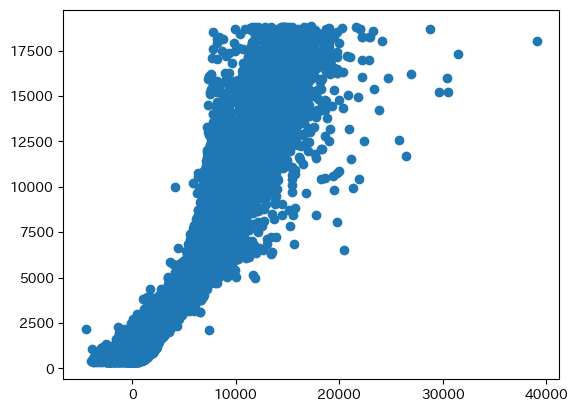

In [40]:
y_pred = fit.predict(x_train)
plt.scatter(y_pred,y_train)

テストデータで性能を評価

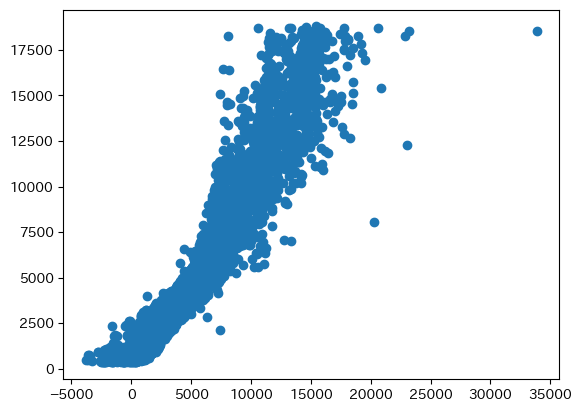

In [41]:
y_pred = fit.predict(x_test)
plt.scatter(y_pred,y_test)

In [ ]:
#予測とデータのお比較
#diamond['predict'] = fit.predict() #予測を行い，結果を'predict'列に追加
#diamond.plot.scatter(x='predict',y='price'); #描画

## 1.2 ロジスティック回帰(10点)

seabornの組み込みデータtitnaicを用いて、生存者をロジスティック回帰を実施しなさい

In [42]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

# データの取得・確認
dataset = sns.load_dataset('titanic')
dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


前処理は以下を用い、データセットはdataset1を利用してもよい。独自に前処理を行ってもよい

In [43]:
# 重複しているカラムと影響の少ない変数の削除
df = ["sibsp","parch","fare","embarked","class","who","adult_male","deck","embark_town","alive","alone"]
dataset1 = dataset.drop(df,axis = 1)
dataset1.head()

# 欠損値の確認
dataset1.isnull().sum()

# 欠損値に平均を補完し性別をダミー変数に変更（男性:1,女性:0）
dataset1["age"] = dataset1["age"].fillna(dataset1["age"].mean())
dataset1["sex"] = dataset1["sex"].map({"male":1, "female":0})
dataset1.isnull().sum()


survived    0
pclass      0
sex         0
age         0
dtype: int64

In [44]:
dataset1

,survived,pclass,sex,age
0,0,3,1,22.000000
1,1,1,0,38.000000
2,1,3,0,26.000000
3,1,1,0,35.000000
4,0,3,1,35.000000
...,...,...,...,...
886,0,2,1,27.000000
887,1,1,0,19.000000
888,0,3,0,29.699118
889,1,1,1,26.000000


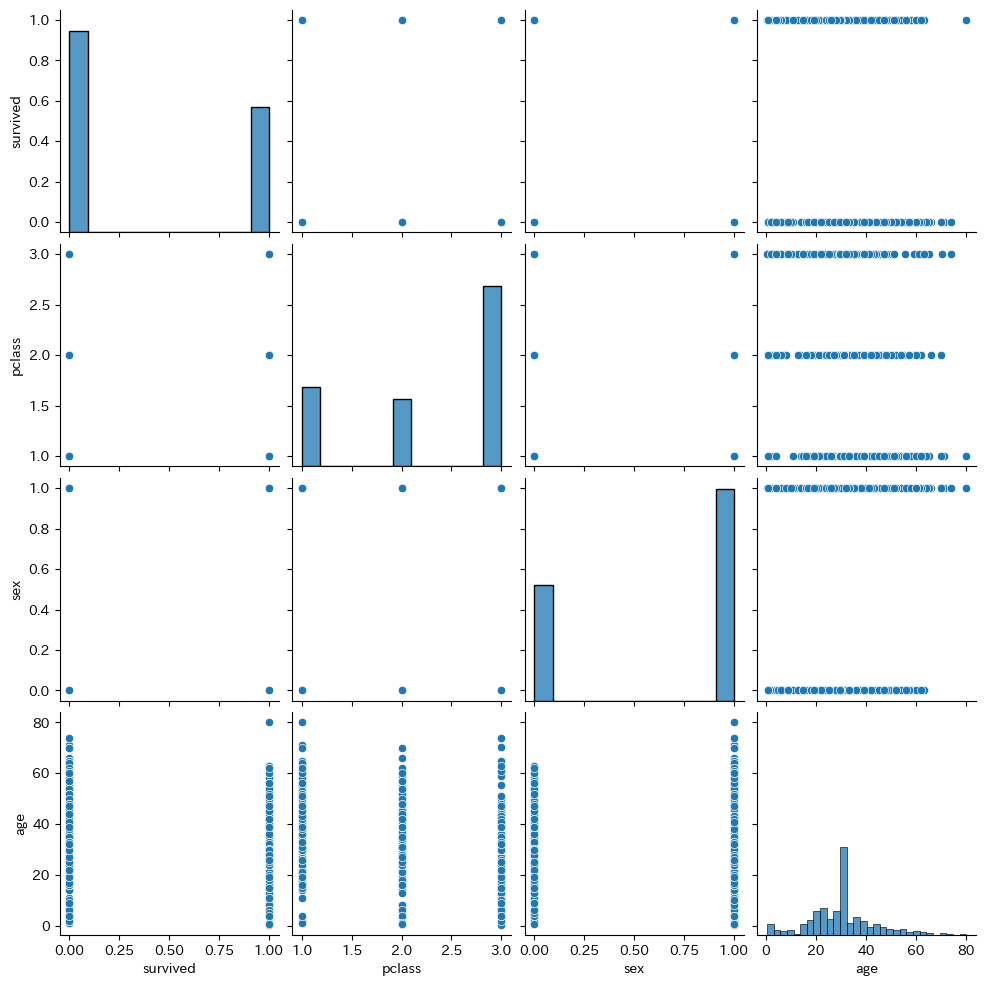

In [45]:
sns.pairplot(dataset1)

トレーニング用とテスト用に分割します

In [46]:
x = dataset1.drop("survived",axis=1)
y = dataset1.pop("survived")
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 1)

In [47]:
df_train = pd.concat([x_train, y_train], axis = 1)

In [48]:
#　回帰の実施

import statsmodels.api as sm
model = smf.glm(formula="survived ~ sex + pclass + age", data=df_train, family= sm.families.Binomial() )
res = model.fit() #学習
print(res.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            725.5214  
Link Function:      Logit            BIC:            -4611.1098
Dependent Variable: survived         Log-Likelihood: -358.76   
Date:               2023-05-27 02:04 LL-Null:        -532.22   
No. Observations:   801              Deviance:       717.52    
Df Model:           3                Pearson chi2:   833.      
Df Residuals:       797              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept   4.6158    0.4707    9.8063  0.0000   3.6932   5.5383
sex        -2.6580    0.1971  -13.4828  0.0000  -3.0444  -2.2716
pclass     -1.1312    0.1247   -9.0697  0.0000  -1.3756  -0.8867
age        -0.0317    0.0077   -4.1195  0.0000  -

AIC=725.521359042033, r2 socre =0.3424991983525262 


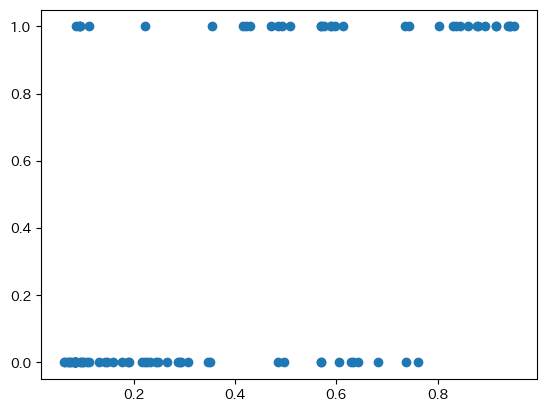

In [49]:
#dataset1['predict'] = fit.predict() #予測を行い，結果を'predict'列に追加
#dataset1.plot.scatter(x='predict',y='survived'); #描画

y_pred = res.predict(x_test)
plt.scatter(y_pred,y_test)
score=r2_score(y_test,y_pred)
print('AIC={}, r2 socre ={} '.format(res.aic,score))

そうえいば、plcassもsexもカテゴリー変数だったので、カテゴリ変数であることを明示的にformulaに記入。(**第8回講義P14、カテゴリー変数の取り扱い**)

In [50]:
model = smf.glm(formula="survived ~ C(sex) + C(pclass) + age", data=df_train, family= sm.families.Binomial() )
res = model.fit() #学習
print(res.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            727.2351  
Link Function:      Logit            BIC:            -4604.7102
Dependent Variable: survived         Log-Likelihood: -358.62   
Date:               2023-05-27 02:05 LL-Null:        -532.22   
No. Observations:   801              Deviance:       717.24    
Df Model:           4                Pearson chi2:   836.      
Df Residuals:       796              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept       3.4344   0.3813   9.0065 0.0000  2.6870  4.1818
C(sex)[T.1]    -2.6560   0.1974 -13.4551 0.0000 -3.0429 -2.2691
C(pclass)[T.2] -1.0010   0.2726  -3.6717 0.0002 -1.5354 -0.4667
C(pclass)[T.3] -2.2417   0.2523  -8.8866 0.0000 -2.7362

ちょっとAICが上がったかな。

r2 socre is  0.33916069345226996
AIC=727.2351378619173, r2 socre =0.33916069345226996 


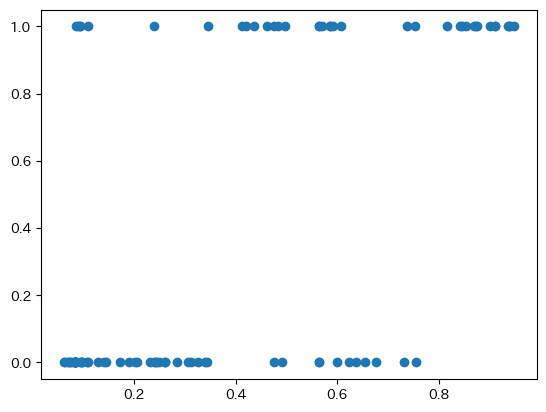

In [51]:
y_pred = res.predict(x_test)
plt.scatter(y_pred,y_test)
score=r2_score(y_test,y_pred)
print('r2 socre is ',score)
print('AIC={}, r2 socre ={} '.format(res.aic,score))

ageと性別(sex)で傾向をみている

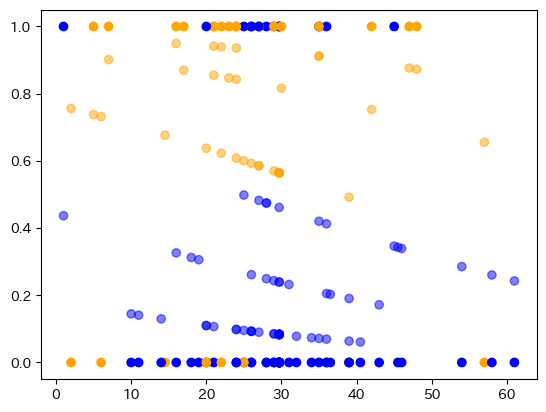

In [52]:
def get_color(sex):
    if(sex==0):
        return 'orange'
    return 'blue'
colors=[get_color(f) for f in x_test['sex']]
plt.scatter(x_test['age'],y_test,c=colors)#
plt.scatter(x_test['age'],y_pred,c=colors,alpha=0.5)

なんとなく、女性(sex=0)で若いほうが生存率が高いのか、、男女差もありそうだな。

(array([30.,  5., 11.,  4.,  8.,  8.,  6.,  4.,  4., 10.]),
 array([0.06090085, 0.14975016, 0.23859947, 0.32744878, 0.41629808,
        0.50514739, 0.5939967 , 0.682846  , 0.77169531, 0.86054462,
        0.94939393]),
 <BarContainer object of 10 artists>)

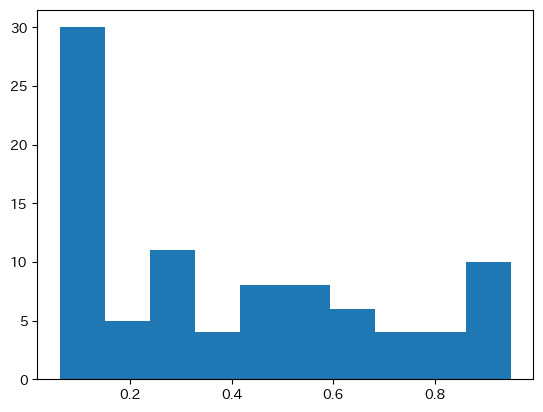

In [53]:
plt.hist(y_pred)

(array([53.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 37.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

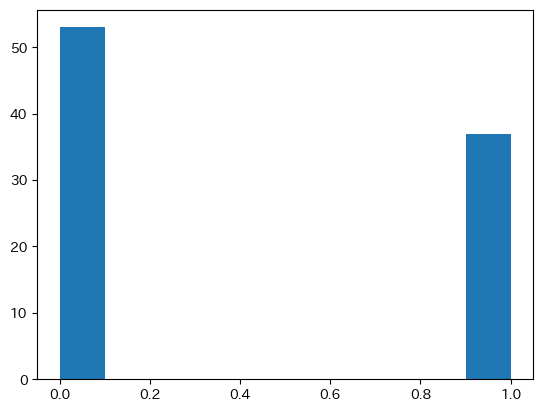

In [54]:
plt.hist(y_test)

In [55]:
res.params

Intercept         3.434414
C(sex)[T.1]      -2.655988
C(pclass)[T.2]   -1.001023
C(pclass)[T.3]   -2.241737
age              -0.031416
dtype: float64

seabornの lmplotを使うと、ロジスティック回帰をした上に、可視化まで一度にやってくれる模様(**第5回講義P25、Implotによる可視化**)

ここでは男女別で、年齢による生存率をロジスティック回帰をやってみた

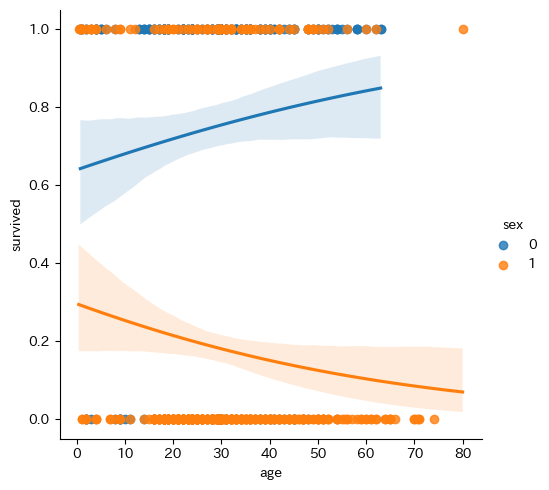

In [56]:
sns.lmplot(x="age", y="survived", hue='sex',data=df_train, logistic=True)

男性(sex=1)と女性(sex=0)では傾向が違うことがわかる。。。

## 2.3 クラスタリング(10点)
- くずし字のデータを取得して、クラス分類や、クラスタリングを行います。
- TSNEで学習したデータに対してクラスタリングを行うことをします。

In [1]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 25.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=3f5626a5778936d067915ad30b529095c126c96eba900010cc2f0eed76f79eab
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


まずはデータを取得します。

In [2]:
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz -O kmnist-train-imgs.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz -O kmnist-train-labels.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz -O kmnist-test-imgs.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz -O kmnist-test-labels.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist_classmap.csv

--2023-05-27 01:55:33--  http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18384171 (18M)
Saving to: ‘kmnist-train-imgs.npz’

kmnist-train-imgs.n 100%[===================>]  17.53M   722KB/s    in 17s     

2023-05-27 01:55:51 (1.03 MB/s) - ‘kmnist-train-imgs.npz’ saved [18384171/18384171]

--2023-05-27 01:55:51--  http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29700 (29K)
Saving to: ‘kmnist-train-labels.npz’

kmnist-train-labels 100%[===================>]  29.00K   179KB/s    in 0.2s    

2023-05-27 01:55:51 (179 KB/s) - ‘kmnist-train-labels.npz’ saved [29700/29

正解ラベル(0,...9)に対応するひらがなを得ます。最初がindex=1から始まるのに注意です。

In [3]:
import numpy as np
names = np.loadtxt('kmnist_classmap.csv', dtype='str')
names

array(['index,codepoint,char', '0,U+304A,お', '1,U+304D,き', '2,U+3059,す',
       '3,U+3064,つ', '4,U+306A,な', '5,U+306F,は', '6,U+307E,ま',
       '7,U+3084,や', '8,U+308C,れ', '9,U+3092,を'], dtype='<U20')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

#最初の5000だけ
train_images = np.load('kmnist-train-imgs.npz')['arr_0'][:5000]
train_labels = np.load('kmnist-train-labels.npz')['arr_0'][:5000]
test_images = np.load('kmnist-test-imgs.npz')['arr_0'][:5000]
test_labels = np.load('kmnist-test-labels.npz')['arr_0'][:5000]

train_imagesにどういうデータがあるかを確認します。

<Figure size 640x480 with 0 Axes>

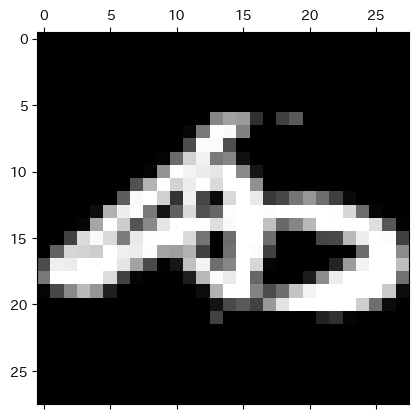

In [5]:
plt.gray()
plt.matshow(train_images[1])

In [6]:
train_data=train_images.reshape(-1, 784)
test_data=test_images.reshape(-1, 784)
train_data[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [7]:
train_images[1].shape

(28, 28)

In [8]:
train_data[1].shape

(784,)

In [9]:
train_images.shape

(5000, 28, 28)

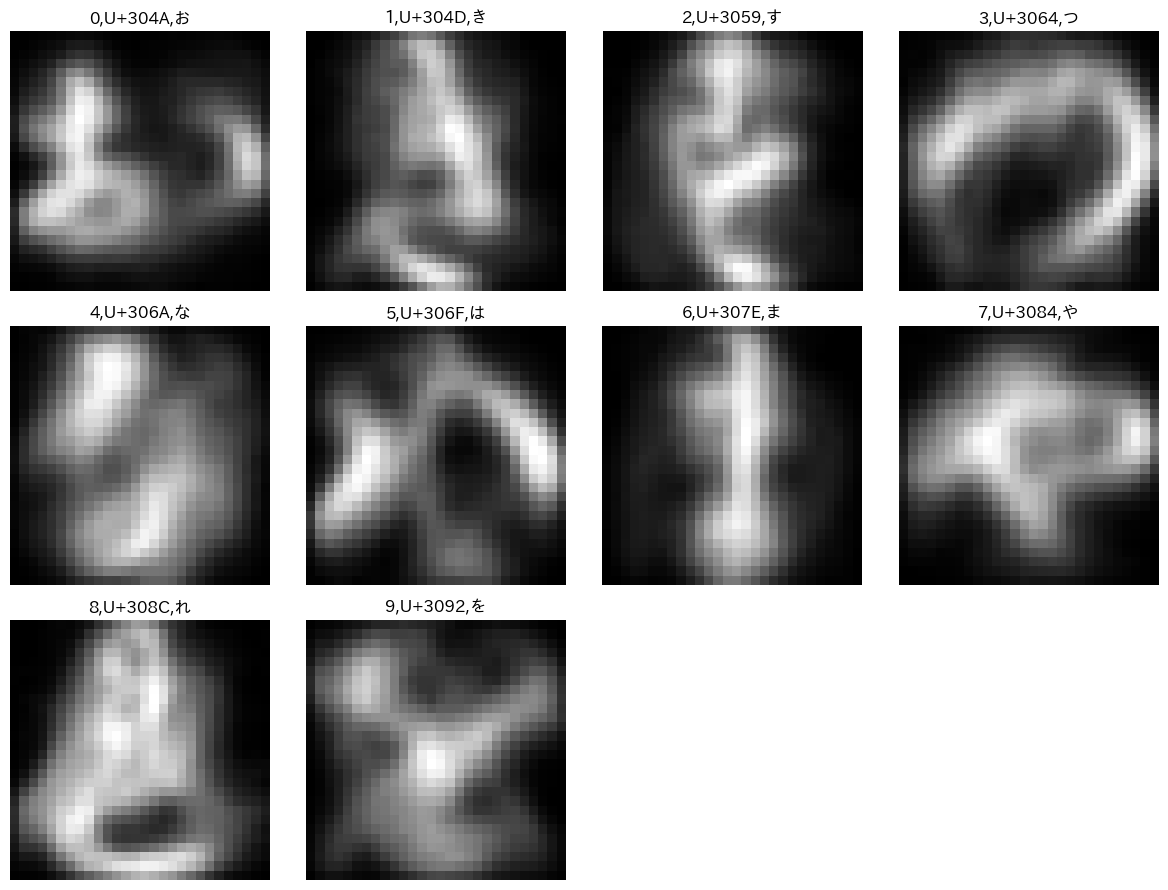

In [10]:
# とりあえず平均をとってみます。

plt.figure(figsize=(12, 9))
for label in range(10):
    plt.subplot(3, 4, label + 1)
    indices = np.where(train_labels == label)
    mean_image = train_images[indices].mean(axis=0)
    plt.imshow(mean_image, cmap='gray')
    plt.title(names[label+1])
    plt.axis('off')
plt.tight_layout()

In [11]:
import sklearn.neighbors
import sklearn.ensemble
import sklearn.metrics

clf_knn = sklearn.neighbors.KNeighborsClassifier(
    n_neighbors=4, weights='distance', n_jobs=7)
clf_knn.fit(train_data, train_labels)
y_pred = clf_knn.predict(test_data)

print(sklearn.metrics.accuracy_score(test_labels, y_pred))
print(sklearn.metrics.classification_report(test_labels, y_pred))
print(sklearn.metrics.confusion_matrix(test_labels, y_pred))

0.8174
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       516
           1       0.87      0.86      0.87       530
           2       0.75      0.80      0.78       495
           3       0.87      0.91      0.89       492
           4       0.88      0.76      0.81       513
           5       0.74      0.85      0.79       485
           6       0.71      0.89      0.79       506
           7       0.92      0.74      0.82       491
           8       0.72      0.87      0.79       504
           9       0.90      0.77      0.83       468

    accuracy                           0.82      5000
   macro avg       0.83      0.82      0.82      5000
weighted avg       0.83      0.82      0.82      5000

[[380   0   1   2   2  70   3  18  39   1]
 [  0 457  12   0   3   3  36   0  14   5]
 [  5   5 398  20   1   8  27   4  16  11]
 [  0   2  13 448   0  12  13   0   4   0]
 [  9  13  13  11 388  18  25   2  26   8]
 [  1   3  33   8  

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

projected = pca.fit_transform(train_data)
print(projected.shape)

(5000, 2)


<ipython-input-13-0ae22cc6564c>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('tab10', 10))


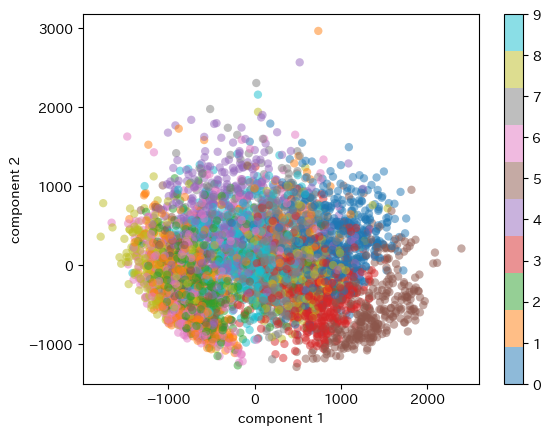

In [13]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=train_labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

PCAの結果はイマイチ、、

そこでTSNEの実施

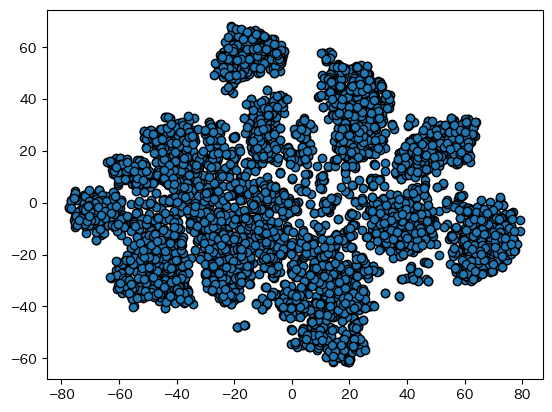

In [14]:
from sklearn.manifold import TSNE
import sklearn.datasets
import seaborn as sns
import pandas as pd

digits2d = TSNE(n_components=2).fit_transform(train_data)

plt.scatter(digits2d[:,0], digits2d[:,1], edgecolors='k')

### 課題1：ここからが問題です。

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


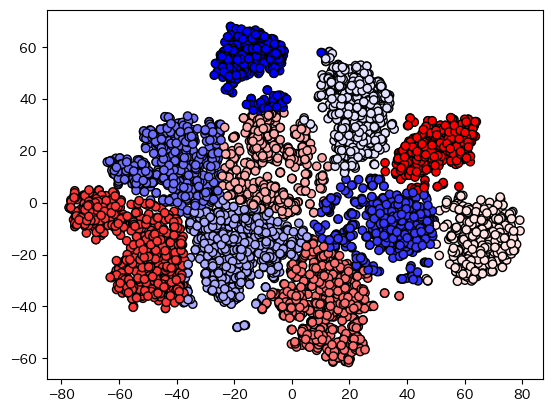

In [15]:
## K平均法をつかってクラスタリングして結果を表示せよ
from sklearn.cluster import KMeans
%matplotlib inline
from matplotlib import cm

#KMeanをつかう、lecture10_clustering.ipynb　を参考

kmeans = KMeans(n_clusters=10)
y_train_est = kmeans.fit_predict(digits2d)

#クラスタリングした結果を表示するための色付けのための予測
#y_train_est = kmeans.predict(digits2d)

#描画はこのようになるはず。
plt.scatter(digits2d[:,0], digits2d[:,1], c=y_train_est, cmap=cm.bwr, edgecolors='k')

# クラスタリングの結果と正解値を比較せよ

In [16]:

train_labels.shape, y_train_est.shape

((5000,), (5000,))

ここでは、もともとのラベルtrain_labelsと予測のラベルy_train_estを比較します。クラスタ番号そのものは対応付けられないので、もとのラベルに対する予測ラベルをがどのように対応しているか、1対１対応になっていそうかなどを可視化しながら確かめた例を示します。

In [17]:
# 正解値と予測値のデータフレームをとりあえずつくる
compare = pd.DataFrame({'labels':train_labels,'est':y_train_est})
compare

,labels,est
0,8,7
1,7,4
2,0,5
3,1,3
4,4,6
...,...,...
4995,1,3
4996,5,2
4997,0,5
4998,7,6


In [18]:
#たとえば正解値=0のものをフィルタリングするとこうなる
compare[compare.labels==0]

,labels,est
2,0,5
12,0,5
29,0,5
37,0,5
38,0,5
...,...,...
4951,0,1
4959,0,5
4965,0,1
4974,0,5


Text(0.5, 1.0, 'cluster for label=0')

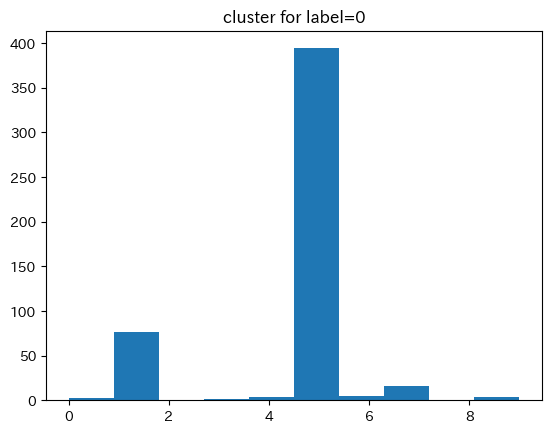

In [19]:
# 元のラベル=0のものに対するTSNE->Kmeansクラスタリング結果を書いてみる
plt.hist(compare[compare.labels==0].est)
plt.title("cluster for label={}".format(0))

もともとのラベル=0のデータは、クラスタ=3に対応しているようにみえる。

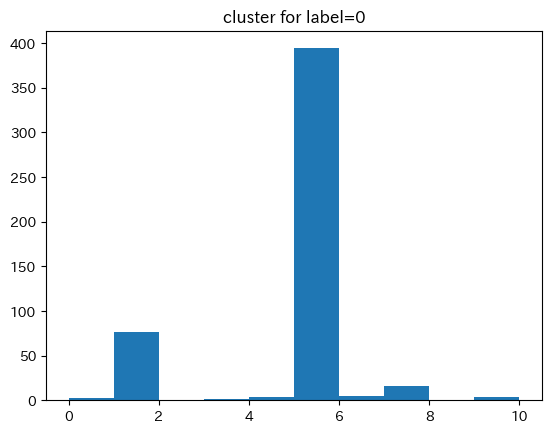

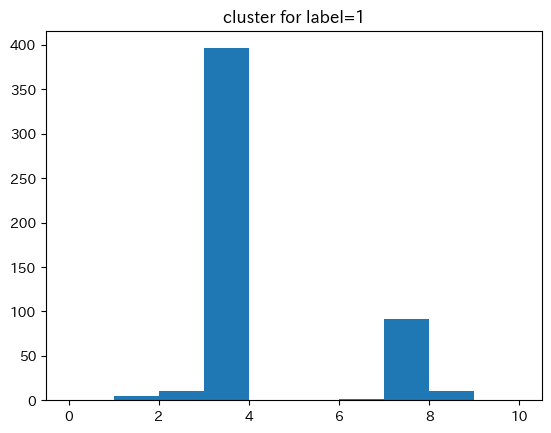

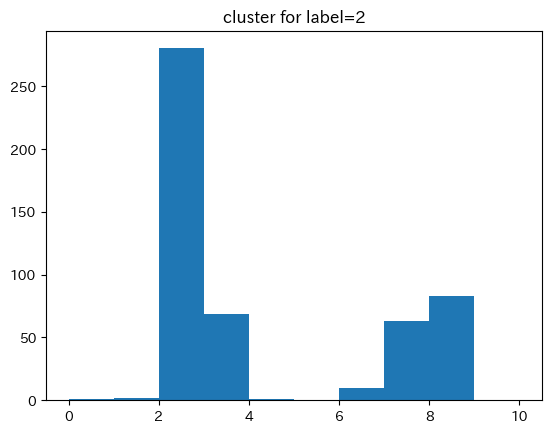

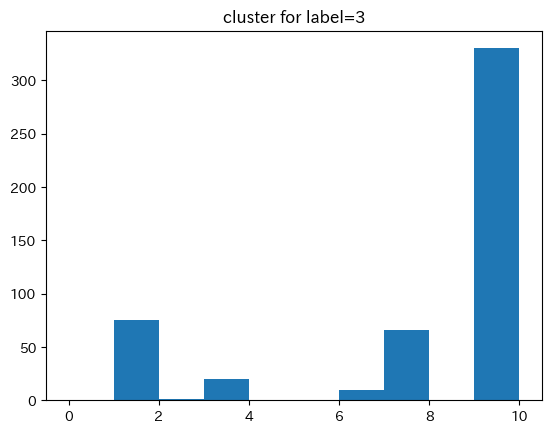

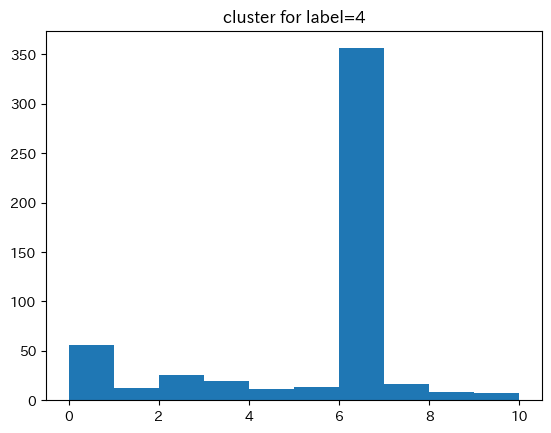

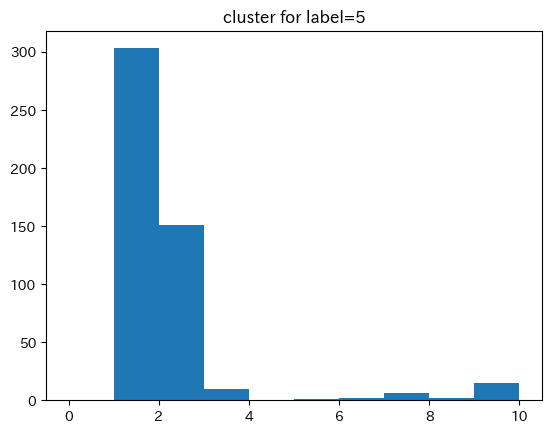

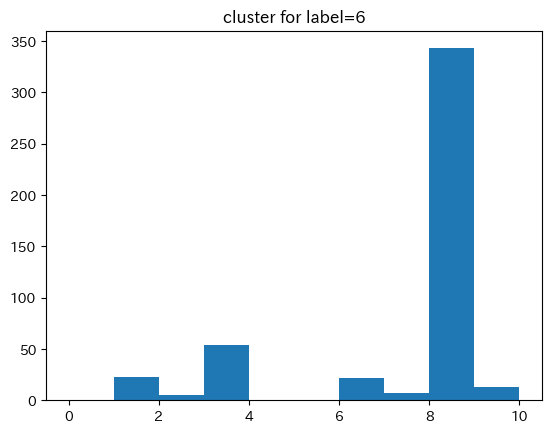

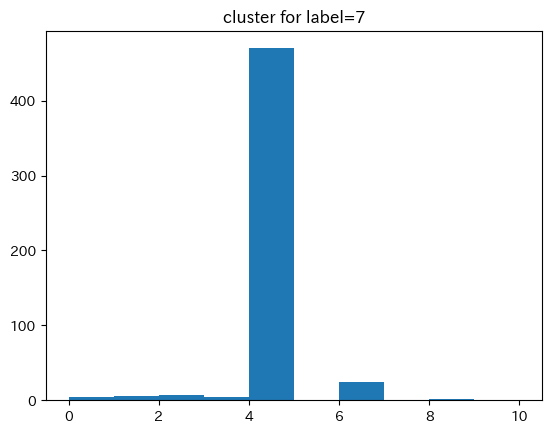

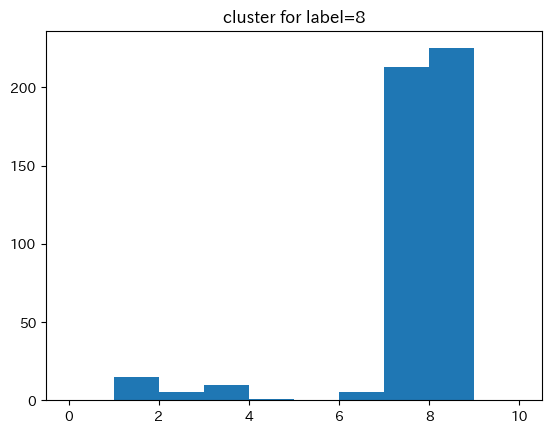

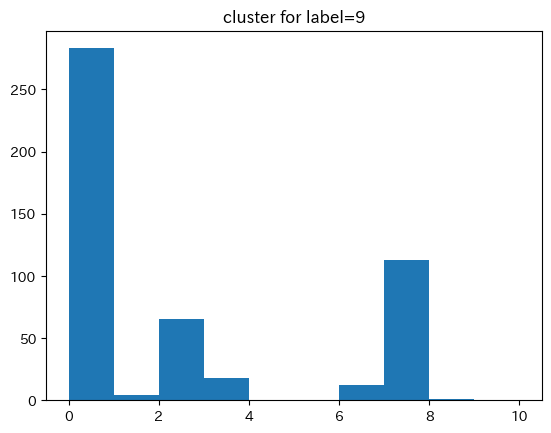

In [20]:
#この調子でグラフをどんどん書いてみる
for i in range(10):
  plt.hist(compare[compare.labels==i].est,range=(0, 10))
  plt.title("cluster for label={}".format(i))
  plt.show()

#### 結論と考察：
- TSNEで次元削減したものをKmeansでクラスタリングした結果
- それぞれのもとのラベルに対してKeamnsのクラスタは、ほぼ１対１に対応

|元ラベル|予測ラベル|
|---|---|
|0|3
|1|4
|2|7
|3|5
|4|9
|5|1
|6|0
|7|8
|8|[0,6]
|9|2

TSNE優秀じゃん

- 精度や誤検出率などの計算などの発展もあるだろう。